<a href="https://colab.research.google.com/github/Chetan-Patil13/servo_mechanism_predictor/blob/main/Servo_Mechanism_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project**

Servo mechanism predictor

-------------

## **Objective**

In control engineering a servomechanism, usually shortened to servo, is an automatic device that uses error-sensing negative
feedback to correct the action of a mechanism. On displacement-controlled applications, it usually includes a built-in encoder or other position
feedback mechanism to ensure the output is achieving the desired effect. The term correctly applies only to systems where the feedback or
error-correction signals help control mechanical position, speed, attitude or any other measurable variables. For example, an automotive power
window control is not a servomechanism, as there is no automatic feedback that controls position—the operator does this by observation. By
contrast a car's cruise control uses closed-loop feedback, which classifies it as a servomechanism.

A data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation of a servo system
involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on of the translational axes of a
robot on the 9th floor of the Al lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to
a step change in a position set point. The variables that describe the data set and their values are the following

1. Motor AB,CDE

2. Screw AB,CDE

3. Pgain 3,4,5,6
4.Vgain1,234,5

5. Class 0.1310 7.10

## **Data Source**

YBI foundation Github

## **Import Library**

In [1]:
import pandas as pd


In [2]:
import numpy as np

## **Import Data**

In [3]:
servo = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv")

In [7]:
servo.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [8]:
servo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


## **Describe Data**

In [10]:
servo.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


## **Data Visualization**

In [11]:
servo.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [12]:
servo.shape

(167, 5)

## **Data Preprocessing**

In [13]:
servo[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [14]:
servo[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

In [15]:
servo.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}}, inplace=True)

In [16]:
servo.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}}, inplace=True)

## **Define Target Variable (y) and Feature Variables (X)**

In [17]:
y = servo['Class']

In [18]:
y.shape

(167,)

In [19]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [21]:
x = servo[['Motor','Screw','Pgain','Vgain']]

In [24]:
x = servo.drop ('Class', axis=1)

In [22]:
x.shape

(167, 4)

In [25]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


## **Train Test Split**

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state =2529)

In [30]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

## **Modeling**

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x_train, y_train)

LinearRegression()

## **Prediction**

In [35]:
y_prediction =lr.predict(x_test)

In [36]:
y_prediction.shape

(51,)

In [37]:
y_prediction

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

## **Model Evaluation**

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
mean_squared_error(y_test,y_prediction)

66.03589175595563

In [41]:
mean_absolute_error(y_test,y_prediction)

7.190539677251235

In [42]:
r2_score(y_test, y_prediction)

0.6807245170563927

# Get Visualization of Actual Vs Predicted Results

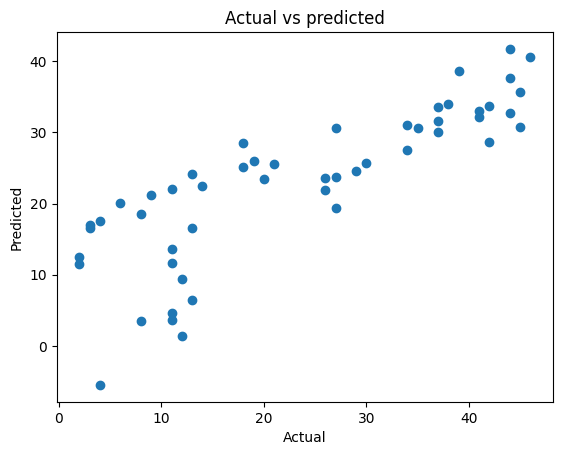

In [44]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_prediction)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs predicted")
plt.show()

# Get Fututure Prediction

In [45]:
x_new = servo.sample(1)

In [48]:
x_new

,Motor,Screw,Pgain,Vgain,Class
18,1,1,5,4,12


In [49]:
x_new.shape

(1, 5)

In [50]:
x_new =x_new.drop ('Class', axis=1)

In [51]:
x_new

,Motor,Screw,Pgain,Vgain
18,1,1,5,4


In [52]:
x_new.shape


(1, 4)

In [53]:
y_prediction_new =lr.predict(x_new)

In [54]:
y_prediction_new

array([19.64176636])